<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction


**What?** Hypothesis testing



# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

In [2]:
# setup the look and feel of the notebook
plt.rcParams['figure.figsize'] = 8, 6
sns.set_context('notebook', font_scale = 1.5, rc = {'lines.linewidth': 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')

# Create a couple of colors to use throughout the notebook
red = sns.xkcd_rgb['vermillion']
blue = sns.xkcd_rgb['dark sky blue']

##  Hypothesis Testing

Lets starts off with a motivating example that asks the question "If you toss a coin 30 times and see 22 heads, is it a fair coin?"

We all know that a fair coin should come up heads roughly 15 out of 30 tosses, give or take, so it does seem unlikely to see so many heads. However, the skeptic might argue that even a fair coin could show 22 heads in 30 tosses from time-to-time. This could just be a chance event. So, the question would then be "how can you determine if we're tossing a fair coin?"

Let's start by first considering the probability of a single coin flip coming up heads and work our way up to 22 out of 30.

$$
\begin{align}
P(H) = \frac{1}{2}
\end{align}
$$

As our equation shows, the probability of a single coin toss turning up heads is exactly 50% since there is an equal chance of either heads or tails turning up. Taking this one step further, to determine the probability of getting 2 heads in a row with 2 coin tosses, we would need to multiply the probability of getting heads by the probability of getting heads again since the two events are independent of one another.

$$
\begin{align}
P(HH) = P(H) \cdot P(H) = P(H)^2 = \left(\frac{1}{2}\right)^2 = \frac{1}{4}
\end{align}
$$

Let's now take a look at a slightly different scenario and calculate the probability of getting 2 heads and 1 tails with 3 coin tosses. To get the actual probability of tossing 2 heads and 1 tails we will have to add the probabilities for all of the possible permutations, of which there are exactly three: HHT, HTH, and THH.

$$
\begin{align}
P(2H,1T) = P(HHT) + P(HTH) + P(THH) = \frac{1}{8} + \frac{1}{8} + \frac{1}{8} = \frac{3}{8}
\end{align}
$$

Another way we could do this is to use the binomial distribution:

$$
\begin{align}
P(N_H,N_T) = \binom{n}{k} p^{k} \left( 1 - p \right)^{n - k}
\end{align}
$$

Where 

- $n$ is number of coin flips
- $p$ is the probability of getting heads on each flip

The $\binom{n}{k}$ tells us how many ways are there to get $k$ heads our of $n$ total number of coin flips?" and the $p^k(1-p)^{n-k}$ answers the question "how likely is any given $k$ heads and $n-k$ tails?", multiply them together and we get the probability of getting exactly $k$ heads.

Now that we understand the classic method, let's use it to test whether we are actually tossing a fair coin.

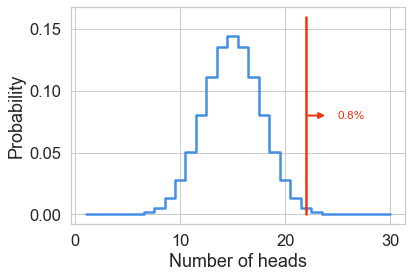

In [3]:
# Calculate the probability for every possible outcome
# of tossing a fair coin 30 k_range

k_range = range(1, 31)  # number of heads appearing
n = 30  # number of k_range tossing the coin
p = 0.5  # probability of coin appearing up as head

prob = stats.binom(n = n, p = p).pmf(k = k_range)

# Plot the probability distribution using the probabilities list 
# we created above.
plt.step(k_range, prob, where = 'mid', color = blue)
plt.xlabel('Number of heads')
plt.ylabel('Probability')
plt.plot((22, 22), (0, 0.1599), color = red)
plt.annotate('0.8%', xytext = (25, 0.08), xy = (22, 0.08), 
             va = 'center', color = red, size = 'large',
             arrowprops = {'arrowstyle': '<|-', 'lw': 2,
                           'color': red, 'shrinkA': 10})
plt.show()

The visualization above shows the probability distribution for flipping a fair coin 30 times. Using this visualization we can now determine the probability of getting, say for example, 12 heads in 30 flips, which looks to be about 8%. Notice that we've labeled our example of 22 heads as 0.8%. If we look at the probability of flipping exactly 22 heads, it looks likes to be a little less than 0.8%, in fact if we calculate it using the function from above, we get 0.5%.

In [4]:
prob = stats.binom(n = n, p = p).pmf(k = 22)
print('Probability of flipping 22 heads: {:0.1f}%'.format(prob * 100))

Probability of flipping 22 heads: 0.5%


So, then why do we have 0.8% labeled in our probability distribution above? Well, that's because we are showing the probability of getting at least 22 heads, which is also known as the **p-value**.

Let's pull back from our example and discuss formally about hypothesis testing. In standard frequentist statistic's hypothesis testing, we start with a null hypothesis that we usually call $H_0$ (pronouced as H naught), which represents our status quo. On the other hand, we also have an alternative hypothesis our $H_1$ that represents the question that we wish to answer, i.e. what we’re testing for.

After setting up our null and alternative hypothesis, we conduct a hypothesis test under the assumption that the null hypothesis is true. If the test results suggest that the data do not provide convincing evidence for the alternative hypothesis, we stick with the null hypothesis. If they do, then we reject the null hypothesis in favor of the alternative.

Frequentist statistic's hypothesis testing uses a p-value to weigh the strength of the evidence (what the data is telling you about the population). p-value is defined as **the probability of obtaining the observed or more extreme outcome, given that the null hypothesis is true (not the probability that the alternative hypthesis is true)**. It is a number between 0 and 1 and interpreted in the following way:

- A small p-value (typically <= 0.05, 0.05 is a commonly used threshold, the threshold is often denoted as $\alpha$) indicates strong evidence against the null hypothesis, so we reject the null hypothesis. This means that something interesting is going on and it’s not just noise!
- A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so we fail to reject the null hypothesis. Although p-value is still in our favor, we cannot conclusively say that it was not due to random noise.
- p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). If you carefully read good papers on these kind of topics, you will always see the p-values being reported so that the readers can draw their own conclusions.

**Example:**

Let's say that a pizza place claims their delivery times are 30 minutes or less on average. Now we think it's actually takes more than 30 minutes. We conduct a hypothesis test because we believe the null hypothesis, that the mean delivery time is 30 minutes maximum, is incorrect. This means that our alternative hypothesis is the mean time is greater than 30 minutes. We randomly sample some delivery times and run the data through the hypothesis test, and our p-value turns out to be 0.01, which is much less than 0.05.

In real terms, there is a probability of 0.01 that we will mistakenly reject the pizza place's claim that their delivery time is less than or equal to 30 minutes. Since typically we are willing to reject the null hypothesis when this probability is less than 0.05, we conclude that the pizza place is wrong; their delivery times are in fact more than 30 minutes on average.

Back with our coin toss example, the null hypothesis assumes we have a fair coin, and the way we determine if this hypothesis is true or not is by calculating how often flipping this fair coin 30 times would result in 22 or more heads. If we then take the number of times that we got 22 or more heads and divide that number by the total of all possible permutations of 30 coin tosses, we get the probability of tossing 22 or more heads with a fair coin. This probability is essentially our p-value.

In [5]:
def compute_pvalue(n, k, p):
    """Returns the p-value for binomial distribution"""
    k_range = range(k, n + 1)
    pvalue = stats.binom(n = n, p = p).pmf(k = k_range).sum()
    return pvalue


pvalue = compute_pvalue(n = 30, k = 22, p = 0.5)
print('P-value: {:0.1f}%'.format(pvalue * 100))

P-value: 0.8%


The role of p-value is used to check the validity of the null hypothesis. The way this is done is by agreeing upon some predetermined upper limit for our p-value, below which we will assume that our null hypothesis is false.

In other words, if our null hypothesis were true, and 22 heads in 30 flips could happen often enough by chance, we would expect to see it happen more often than the given threshold percentage of times. So, for example, if we chose 10% as our p-value threshold, then we would expect to see 22 or more heads show up at least 10% of the time to determine that this is a chance occurrence and not due to some bias in the coin. Historically, the generally accepted threshold has been 5%, and so if our p-value is less than 5%, we can then make the assumption that our coin may not be fair.

Running the code above gives us a p-value of roughly 0.8%, which matches the value in our probability distribution above and is also less than the 5% threshold needed to reject our null hypothesis, so it does look like we may have a biased coin.

In [6]:
# we can also use the binom_test function from scipy to
# perform the hypothesis testing
pvalue = stats.binom_test(x = 22, n = 30, p = 0.5, alternative = 'greater')
print('P-value: {:0.1f}%'.format(pvalue * 100))

P-value: 0.8%


## Simulation

Instead of using the statistical approach, the code below seeks to answer the same question of whether or not our coin is fair by running a large number of simulated coin flips and calculating the proportion of these experiments that resulted in at least 22 heads or more.

In [7]:
def coin_toss(n_simulation = 100000):
    """
    computing a fair coin resulting in at
    least 22 heads or more through simulation
    """
    pvalue = 0
    for i in range(n_simulation):
        # trials: 1 denotes head, 0 denotes tail
        trials = np.random.randint(2, size = 30)
        if trials.sum() >= 22:
            pvalue += 1

    pvalue /= n_simulation
    return pvalue


pvalue = coin_toss()
print('Simulated P-value: {:0.1f}%'.format(pvalue * 100))

Simulated P-value: 0.8%


The result of our simulations is 0.8%, the exact same result we got earlier when we calculated the p-value using the classical method above.

# References


- [Blog: What Are P-Values?](https://prateekvjoshi.com/2013/12/07/what-are-p-values/)
- [Code taken from here](https://github.com/ethen8181/machine-learning/blob/master/ab_tests/frequentist_ab_test.ipynb)

